# Fake News Detection using Machine Learning

## Objective:
To build a machine learning model that can classify news articles as
Fake or Real using Natural Language Processing (NLP).

## Type:
- Supervised Learning
- Text Classification


In [39]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
import os
print(os.listdir(r"C:\Users\karan\Fake News Detector\Data"))

['.ipynb_checkpoints', 'Fake News.csv', 'True News.csv']


In [41]:
fake = pd.read_csv(r"C:\Users\karan\Fake News Detector\Data\Fake News.csv")
true = pd.read_csv(r"C:\Users\karan\Fake News Detector\Data\True News.csv")

In [42]:
fake.head(), true.head()

(                                               title  \
 0   Donald Trump Sends Out Embarrassing New Year’...   
 1   Drunk Bragging Trump Staffer Started Russian ...   
 2   Sheriff David Clarke Becomes An Internet Joke...   
 3   Trump Is So Obsessed He Even Has Obama’s Name...   
 4   Pope Francis Just Called Out Donald Trump Dur...   
 
                                                 text subject  \
 0  Donald Trump just couldn t wish all Americans ...    News   
 1  House Intelligence Committee Chairman Devin Nu...    News   
 2  On Friday, it was revealed that former Milwauk...    News   
 3  On Christmas day, Donald Trump announced that ...    News   
 4  Pope Francis used his annual Christmas Day mes...    News   
 
                 date  
 0  December 31, 2017  
 1  December 31, 2017  
 2  December 30, 2017  
 3  December 29, 2017  
 4  December 25, 2017  ,
                                                title  \
 0  As U.S. budget fight looms, Republicans flip t...   
 1  U

In [43]:
fake['label'] = 0
true['label'] = 1

In [44]:
fake['content'] = fake['title'] + " " + fake['text']
true['content'] = true['title'] + " " + true['text']

In [45]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'<.*?>+', '', text)
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    return text

In [46]:
fake['clean_text'] = fake['content'].apply(clean_text)
true['clean_text'] = true['content'].apply(clean_text)

In [47]:
data = pd.concat([fake, true], axis=0)
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle

In [48]:
X = data['clean_text']
y = data['label']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [50]:
TfidfVectorizer(
    stop_words='english',
    ngram_range=(1, 2),   # unigrams + bigrams
    max_df=0.85,
    min_df=5
)

,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None
,analyzer,'word'
,stop_words,'english'
,token_pattern,'(?u)\\b\\w\\w+\\b'
,ngram_range,"(1, ...)"


In [51]:
vectorizer = TfidfVectorizer(
    stop_words='english',
    max_df=0.7
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [52]:
##Linear SVM beats Logistic Regression for text.
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,loss,'squared_hinge'
,dual,'auto'
,tol,0.0001
,C,1.0
,multi_class,'ovr'
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,verbose,0
,random_state,None


In [53]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [54]:
##Handle Class Imbalance (VERY IMPORTANT)
data['label'].value_counts()

label
0    23481
1    21417
Name: count, dtype: int64

In [63]:
y_pred = model.predict(X_test_tfidf)

In [64]:
data = data[data['clean_text'].str.len() > 100]

In [66]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)
print("Average Accuracy:", scores.mean())

Average Accuracy: 0.9834622943556102


In [65]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9864142538975501


In [57]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4679
           1       0.98      0.99      0.99      4301

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



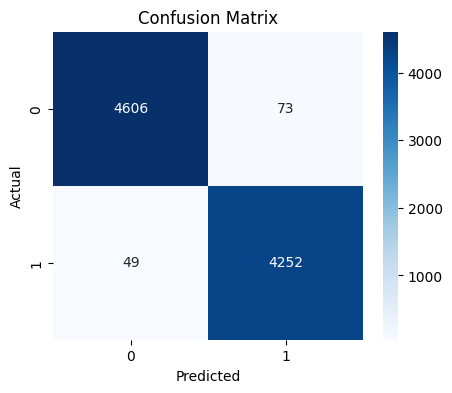

In [58]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [59]:
def predict_news(news_text):
    cleaned = clean_text(news_text)
    vectorized = vectorizer.transform([cleaned])
    prediction = model.predict(vectorized)
    
    return "Fake News ❌" if prediction[0] == 0 else "Real News ✅"

In [60]:
news = """
Government launches new employment scheme to support rural youth across India.
"""

print(predict_news(news))

Real News ✅


In [61]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

In [62]:
import os
os.listdir("..")

['.ipynb_checkpoints',
 'app.py',
 'Data',
 'model.pkl',
 'Notebook',
 'requirements.txt',
 'vectorizer.pkl']